# Import Libraries

In [38]:
import os

#basic libraries
import numpy as np
import pandas as pd

#plotting
from matplotlib import pyplot as plt
import seaborn as sns


#sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *



#sktime
from sktime.transformations.series.sax import SAX
from sktime.transformations.series.paa import PAA


#scipy
from scipy.stats import kurtosis, skew


# Load time series .npy

Loaded time series with length treshold 1280

In [39]:
def load_npy(filename):
    return np.load(filename)

In [40]:
dir_path = '/Users/daviderizzello/Documents/UNIPI/Data_Mining/Progetto_DM2/Data/Raw/time_series/'
len_threshold = 1280

In [41]:
X, y, ids = [], [], []

for file in os.listdir(dir_path):
    if os.path.splitext(file)[1] != '.npy':
        continue

    split = file.split("_")
    ids.append(split[0]) # track_id
    y.append(split[1][:-4]) # genre
    ts = load_npy(dir_path + file)
    
    if len(ts) > len_threshold:
        ts = ts[0:len_threshold]
        
    else: #caso ts minore di 1280
        # pad = [np.mean(ts[:-5])] * (len_threshold-len(ts)) # fill by mean value of last n observations
        pad = [ts[-1]] * (len_threshold-len(ts)) # fill with last observation
        ts = np.append(ts, pad) 

    X.append([ts])

X, y, ids = np.array(X), np.array(y), np.array(ids)


In [42]:
X.shape, y.shape

((10000, 1, 1280), (10000,))

In [43]:
print(X)

[[[ 768.95392809  828.02258438  941.38630447 ... 1442.91478617
   1391.23601795 1321.28390846]]

 [[3230.21111891 3344.52008121 3136.68604971 ... 1130.3803975
    978.28691948  899.69898037]]

 [[2192.69421881 1986.90485659 2082.59886419 ... 3533.68370914
   3432.65255657 3476.44208633]]

 ...

 [[2744.44416673 2714.7230879  2696.45324601 ... 3747.16287653
   3684.38455206 3837.18621856]]

 [[1679.19150849 1371.38211376 1276.83064524 ... 1590.93902708
   1215.85383607 1044.4196475 ]]

 [[1760.40333559 1669.68354612 1690.64028044 ... 2342.71927807
   3021.21525668 3253.65964701]]]


In [56]:
u = list(np.unique(y))
print(f"Genres are: {u}")

Genres are: ['emo', 'folk', 'goth', 'happy', 'heavy-metal', 'honky-tonk', 'j-idol', 'kids', 'minimal-techno', 'mpb', 'new-age', 'opera', 'piano', 'progressive-house', 'salsa', 'sertanejo', 'sleep', 'songwriter', 'synth-pop', 'world-music']


In [57]:
df = pd.DataFrame(np.squeeze(X))
df["genre"] = y

In [58]:
df['genre'].value_counts()

opera                500
minimal-techno       500
progressive-house    500
songwriter           500
synth-pop            500
sertanejo            500
happy                500
j-idol               500
folk                 500
kids                 500
honky-tonk           500
world-music          500
sleep                500
salsa                500
heavy-metal          500
mpb                  500
new-age              500
emo                  500
goth                 500
piano                500
Name: genre, dtype: int64

# Sampling

In [59]:
from sklearn.utils import resample
import pandas as pd

camp = 0.2  # 20% sample rate

# Calculate the number of rows to sample per genre
righe_per_classe = int(len(df) * camp / len(df["genre"].unique()))

# Initialize an empty DataFrame to store the sample
df_sample = pd.DataFrame()

# For each genre, sample 20% of rows
for genere, dati in df.groupby("genre"):
    campione_classe = resample(dati, n_samples=righe_per_classe, replace=False, random_state=42)
    df_sample = pd.concat([df_sample, campione_classe], ignore_index=True)


In [60]:
print(df_sample.shape)
df_sample['genre'].value_counts()

(2000, 1281)


emo                  100
folk                 100
synth-pop            100
songwriter           100
sleep                100
sertanejo            100
salsa                100
progressive-house    100
piano                100
opera                100
new-age              100
mpb                  100
minimal-techno       100
kids                 100
j-idol               100
honky-tonk           100
heavy-metal          100
happy                100
goth                 100
world-music          100
Name: genre, dtype: int64

In [61]:
# Assegna la variabile target
y = df.iloc[:, -1].values

# Assegna il resto dei valori a X escludendo l'ultima colonna
X = df.iloc[:, :-1].values
X.shape, y.shape


((10000, 1280), (10000,))

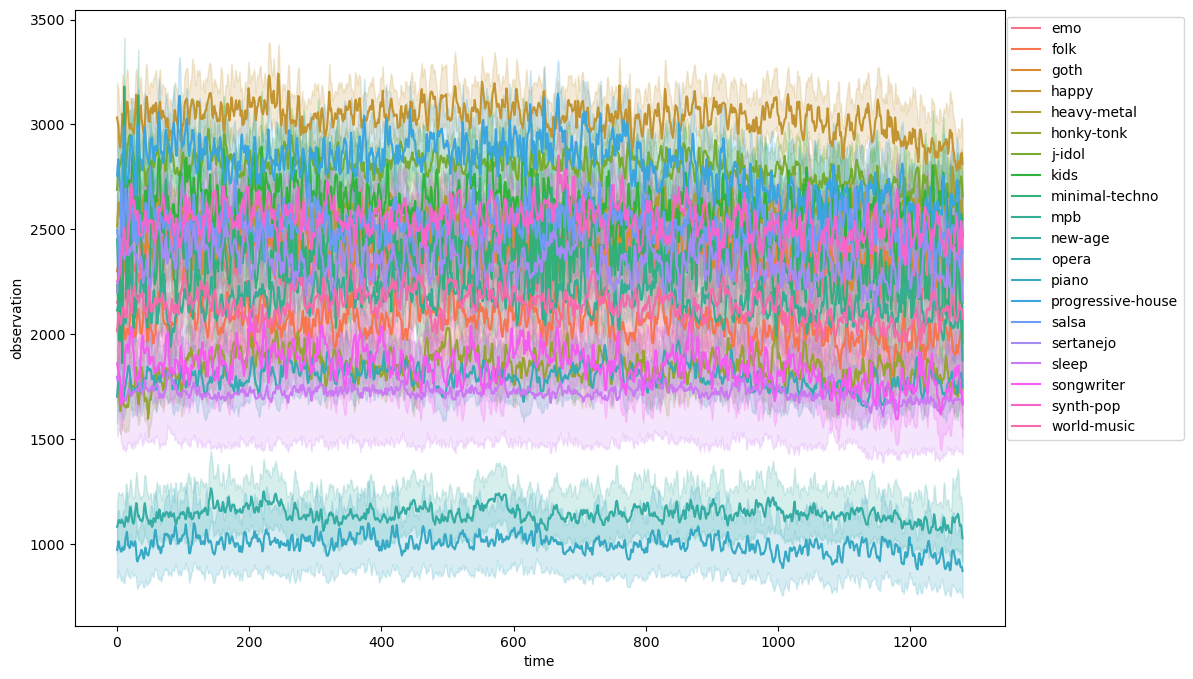

In [45]:
#y = LabelEncoder().fit_transform(y) #[1,10,12,14,15] se voglio numerico
"""
l_gen = ['emo', 'folk', 'goth', 'happy', 'heavy-metal', 'honky-tonk',
       'j-idol', 'kids', 'minimal-techno', 'mpb', 'new-age', 'opera',
       'piano', 'progressive-house', 'salsa', 'sertanejo', 'sleep',
       'songwriter', 'synth-pop', 'world-music']

plt.figure(figsize=(12, 8))  # Imposta larghezza a 10 pollici e altezza a 6 pollici
#filtro solo per alcuni generi
df_filtered = df_sample[df_sample['genre'].isin(l_gen)] 

df_melt = df_filtered.melt(value_name="observation", var_name="time", id_vars="genre")
#cosi posso osservare ts per x generi scelti dalla target

sns.lineplot(df_melt, x="time", y="observation", estimator="mean", hue="genre")

# Posiziona la legenda ancora più a destra
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')

# Posiziona la legenda sotto il grafico
# plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

plt.show()
"""

Transforming time series np array from 3D to 2D. I could need it for future algorithms

In [13]:
#tranform 3D np array to 2D
X_reshaped = X.reshape(X.shape[0], X.shape[2])

In [14]:
X_reshaped

array([[ 768.95392809,  828.02258438,  941.38630447, ..., 1442.91478617,
        1391.23601795, 1321.28390846],
       [3230.21111891, 3344.52008121, 3136.68604971, ..., 1130.3803975 ,
         978.28691948,  899.69898037],
       [2192.69421881, 1986.90485659, 2082.59886419, ..., 3533.68370914,
        3432.65255657, 3476.44208633],
       ...,
       [2744.44416673, 2714.7230879 , 2696.45324601, ..., 3747.16287653,
        3684.38455206, 3837.18621856],
       [1679.19150849, 1371.38211376, 1276.83064524, ..., 1590.93902708,
        1215.85383607, 1044.4196475 ],
       [1760.40333559, 1669.68354612, 1690.64028044, ..., 2342.71927807,
        3021.21525668, 3253.65964701]])

In [15]:
X

array([[[ 768.95392809,  828.02258438,  941.38630447, ...,
         1442.91478617, 1391.23601795, 1321.28390846]],

       [[3230.21111891, 3344.52008121, 3136.68604971, ...,
         1130.3803975 ,  978.28691948,  899.69898037]],

       [[2192.69421881, 1986.90485659, 2082.59886419, ...,
         3533.68370914, 3432.65255657, 3476.44208633]],

       ...,

       [[2744.44416673, 2714.7230879 , 2696.45324601, ...,
         3747.16287653, 3684.38455206, 3837.18621856]],

       [[1679.19150849, 1371.38211376, 1276.83064524, ...,
         1590.93902708, 1215.85383607, 1044.4196475 ]],

       [[1760.40333559, 1669.68354612, 1690.64028044, ...,
         2342.71927807, 3021.21525668, 3253.65964701]]])

In [16]:
np.savez('X_reshaped', X_reshaped)
np.savez('X', X)

In [17]:
print(X.shape)
print(X_reshaped.shape)

(10000, 1, 1280)
(10000, 1280)


In [18]:
#check ts length
assert all(len(ts[0]) == len_threshold for ts in X), "Non tutte le serie temporali sono della lunghezza corretta"


In [19]:
## Ready to be used with sktime library ##

# array of 10000  1-dimentional arrays, each of length 1280
#         (10000, 1,                                   1280)

In [20]:
# these (or any other) numpy arrays can be also saved as npy files (for subsequent reloading)
np.savez('X_y_ids', X, y, ids)


In [37]:
# reload
X_y_ids = load_npy('X_y_ids.npz') 
X, y, ids = X_y_ids['arr_0'], X_y_ids['arr_1'], X_y_ids['arr_2']

NameError: name 'load_npy' is not defined

# Data Understading

I'll use the sampled df to make things computationally easier

In [62]:
df = df_sample.reset_index(drop=True).copy()


In [63]:
ts1_df = df.iloc[0, :-1]
ts1_df


0       2074.880351
1       2208.243794
2       2452.509414
3       2356.812104
4       2302.139294
           ...     
1275    2227.352176
1276    2220.432957
1277    2199.528946
1278    2386.410088
1279    2492.308459
Name: 0, Length: 1280, dtype: object

In [85]:
# Assegna la variabile target
y = df.iloc[:, -1].values
np.save('y', y)

# Assegna il resto dei valori a X escludendo l'ultima colonna
X = df.iloc[:, :-1].values
X.shape, y.shape

((2000, 1280), (2000,))

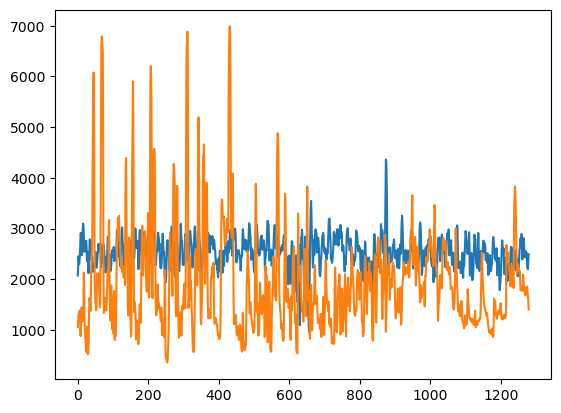

In [25]:
#codici creazione ts di prova da df

ts1_df = df.iloc[0, :-1]
ts2_df = df.iloc[999, :-1]

ts1_df.plot()
ts2_df.plot()
plt.show()


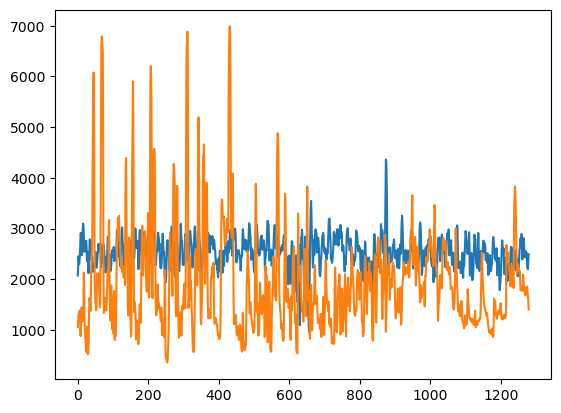

In [26]:
ts1 = X[0].T
ts2 = X[999].T

plt.plot(ts1)
plt.plot(ts2)
plt.show()


Visualizing one song for every genre.

IndexError: index 2000 is out of bounds for axis 0 with size 2000

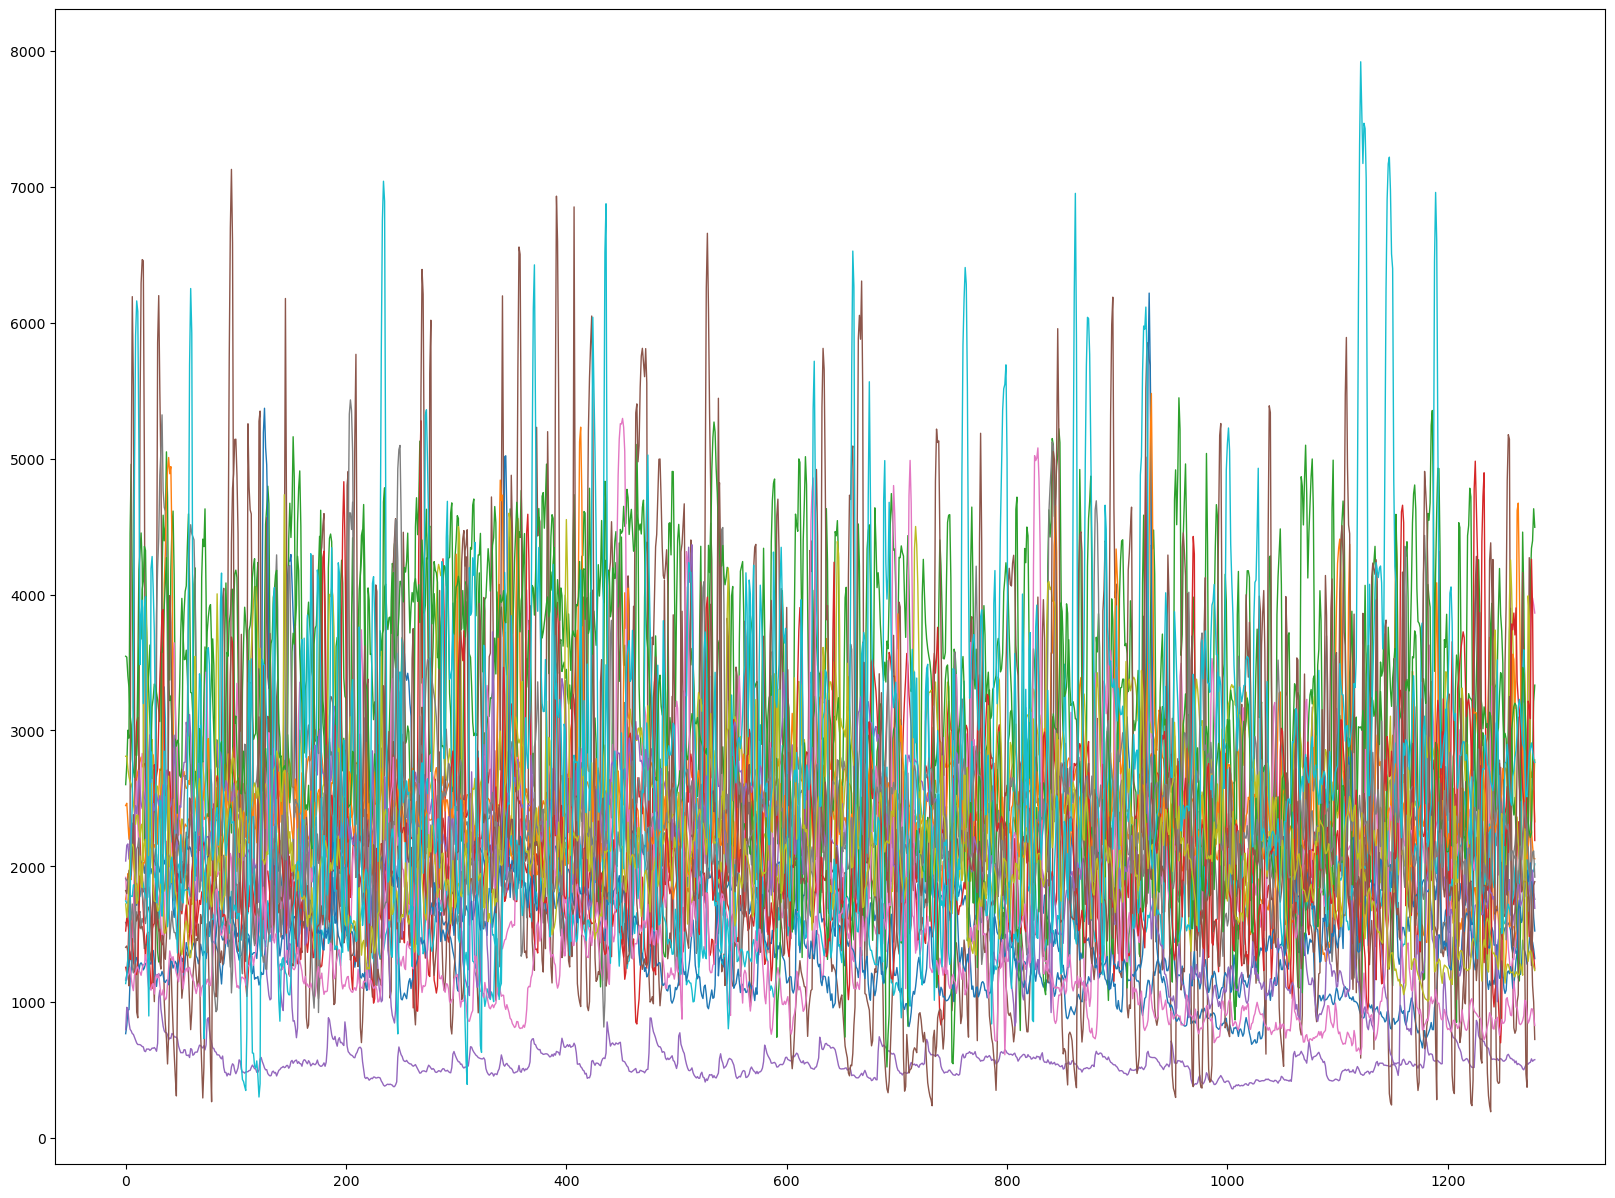

In [27]:
def plot_time_series(data, ids, y):
    plt.figure(figsize=(20, 15))
    genres_used = set()
    for i in range(0, len(data)):
        if y[i] in u and y[i] not in genres_used:
            genres_used.add(y[i])
            plt.plot(data[i], label=f'ID: {ids[i]}, Genre: {y[i]}', linewidth=1)

    plt.title('Time Series of Spectral Centroids')
    plt.xlabel('Time')
    plt.ylabel('Spectral Centroid')
    plt.legend()
    plt.show()

# Plot one ts for each genre
plot_time_series(X_reshaped, ids, y)


A little bit of descriptive statitistic to understand what kind of pre-processing we should perform

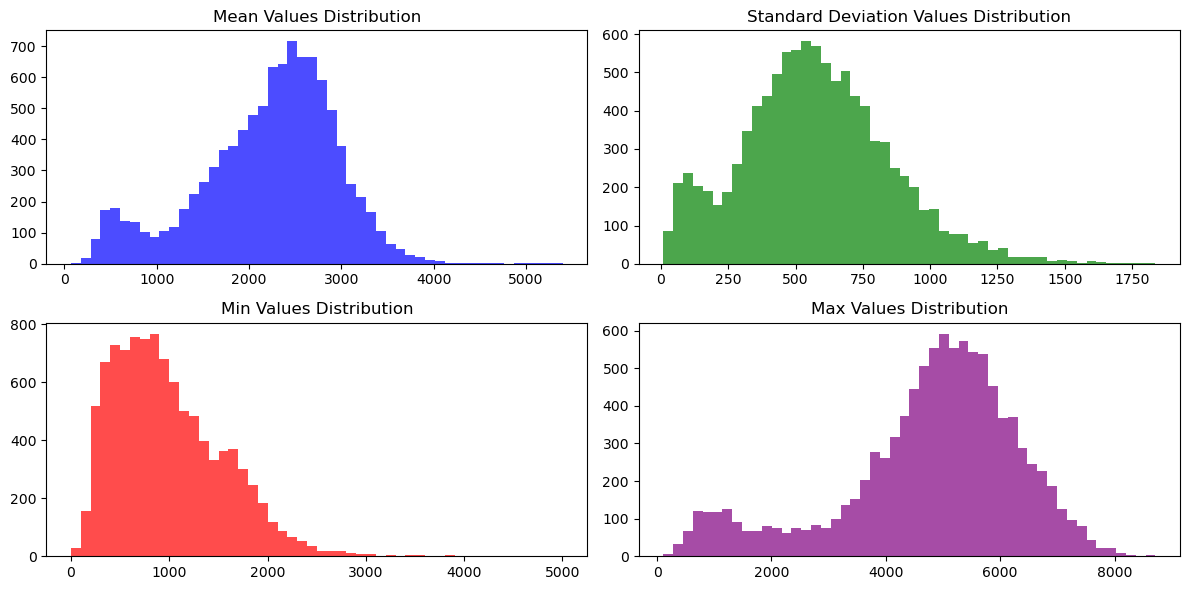

In [33]:
# Calcolo delle statistiche descrittive per ogni serie temporale
mean_values = np.mean(X, axis=2)  
std_values = np.std(X, axis=2)   
min_values = np.min(X, axis=2)    
max_values = np.max(X, axis=2)    


# Visualizzazione delle statistiche descrittive
plt.figure(figsize=(12, 6))
    
plt.subplot(2, 2, 1)
plt.hist(mean_values, bins=50, color='blue', alpha=0.7)
plt.title('Mean Values Distribution')
    
plt.subplot(2, 2, 2)
plt.hist(std_values.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Standard Deviation Values Distribution')
    
plt.subplot(2, 2, 3)
plt.hist(min_values, bins=50, color='red', alpha=0.7)
plt.title('Min Values Distribution')
    
plt.subplot(2, 2, 4)
plt.hist(max_values, bins=50, color='purple', alpha=0.7)
plt.title('Max Values Distribution')
    
plt.tight_layout()
plt.show()



In [34]:
df = pd.DataFrame(X_reshaped)
df['genre'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,768.953928,828.022584,941.386304,945.749554,1159.725465,1240.333451,1423.674344,1634.191655,1828.503961,1847.519588,...,1340.313921,1279.665800,1360.056734,1444.307480,1517.640273,1458.297057,1442.914786,1391.236018,1321.283908,opera
1,3230.211119,3344.520081,3136.686050,2845.915331,2808.156723,2651.146880,2495.342218,2549.019959,2661.295847,2727.635261,...,2694.619211,3191.035809,2830.924961,2308.329541,1724.827512,1325.563666,1130.380398,978.286919,899.698980,minimal-techno
2,2192.694219,1986.904857,2082.598864,2254.738538,2401.683572,2407.616566,2217.455236,2091.153692,1957.757435,1862.646861,...,3025.026862,3222.103029,3303.188014,3347.910378,3343.393614,3378.469131,3533.683709,3432.652557,3476.442086,goth
3,1050.270174,1122.238261,1176.087855,1132.076020,1099.776970,1044.397110,1017.142440,1071.410733,1101.055515,1114.730346,...,877.321930,859.559805,802.391176,798.260556,753.313485,770.064609,804.954898,839.047077,851.398559,opera
4,2467.430056,2222.344861,2053.680022,1733.958104,1115.226422,821.548505,964.249252,1550.314474,2235.348186,2176.156140,...,763.993678,1417.110211,1939.536578,1798.345901,1245.512644,1079.249670,1005.486618,926.054992,964.566937,minimal-techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2548.124862,2546.788233,2649.905705,2659.042892,2739.511966,2733.944363,2880.998890,2981.835024,3166.374133,3280.319527,...,3029.181437,2885.266212,2740.819521,2545.461249,2638.891888,2936.289554,2917.328360,2730.350407,2609.564983,sleep
9996,2228.440176,2254.232821,2708.213067,2628.270963,2435.534537,2608.498513,2880.992403,3051.814048,2945.827688,2689.657712,...,2323.393471,2266.863656,2222.550753,2289.493743,2308.147315,2370.018721,2399.885699,2172.397959,2040.035946,songwriter
9997,2744.444167,2714.723088,2696.453246,2946.824085,3290.350700,3590.748661,3391.136867,2875.449961,3000.725993,3341.052924,...,6206.808889,5680.641287,3864.233246,3679.890839,3784.591377,3828.972870,3747.162877,3684.384552,3837.186219,kids
9998,1679.191508,1371.382114,1276.830645,1667.736417,1932.889145,1889.347707,1701.279505,1684.952873,1677.765190,1429.459174,...,2954.189607,2065.144493,2008.085378,1958.001344,1771.220881,1758.607273,1590.939027,1215.853836,1044.419647,kids


In [36]:
def weighted_avg_and_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values - average)**2, weights=weights)
    return (average, np.sqrt(variance))

# Group by genre
grouped = df.groupby('genre')

# Compute overall mean and std for each genre
genre_stats = grouped.apply(lambda x: pd.Series({
    'mean': x.iloc[:, :-1].values.mean(),
    'std': x.iloc[:, :-1].values.std()
}))

print(genre_stats)

                          mean          std
genre                                      
emo                2444.770214   958.880400
folk               2014.881356   825.928826
goth               2386.595772   731.734735
happy              3039.379834   716.733796
heavy-metal        2626.698452   506.582534
honky-tonk         1833.334238   673.413781
j-idol             2816.927503   593.787380
kids               2584.823535  1078.132179
minimal-techno     2267.626643  1109.743725
mpb                2207.863914   817.825381
new-age            1173.763282   619.714995
opera              1772.377396   660.518891
piano               980.599230   796.060113
progressive-house  2739.272744   881.011611
salsa              2590.274198   791.509438
sertanejo          2360.410643   752.693857
sleep              1743.158106  1306.305618
songwriter         1858.587711   851.137210
synth-pop          2526.631668   835.090120
world-music        2182.917011   812.375852


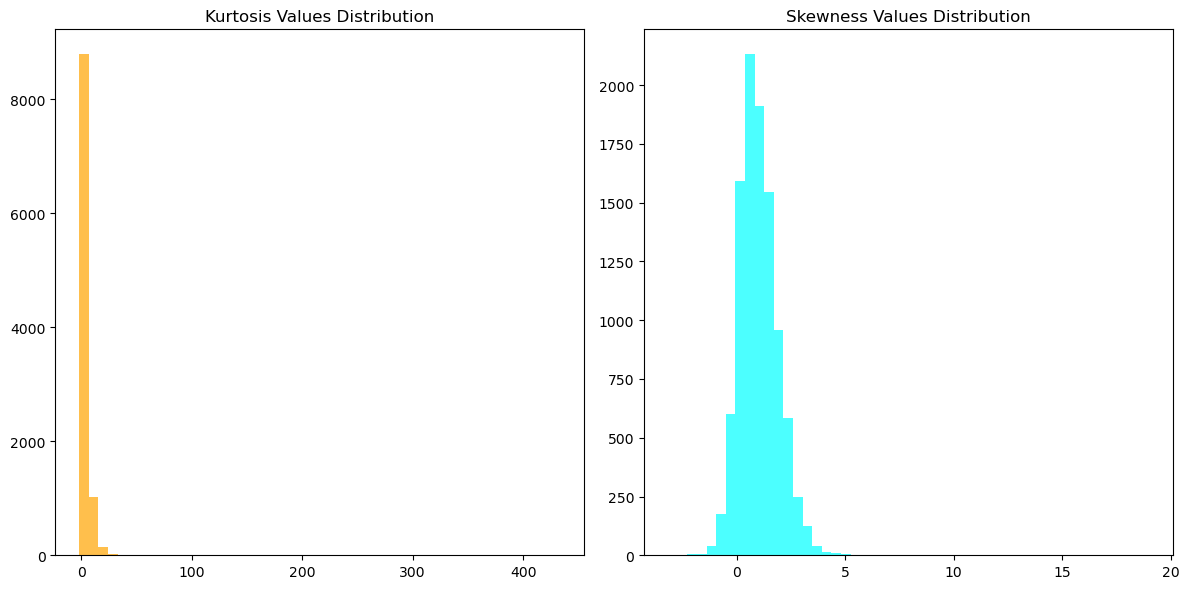

In [37]:
# Funzione per calcolare kurtosi e skewness
def compute_kurtosis_skewness(X):
    num_samples = X.shape[0]
    kurtosis_values = np.zeros(num_samples)
    skewness_values = np.zeros(num_samples)
    for i in range(num_samples):
        kurtosis_values[i] = kurtosis(X[i][0])
        skewness_values[i] = skew(X[i][0])
    return kurtosis_values, skewness_values

kurtosis_values, skewness_values = compute_kurtosis_skewness(X)

# Visualizzazione della distribuzione di kurtosi e skewness
def plot_kurtosis_skewness(kurtosis_values, skewness_values):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(kurtosis_values, bins=50, color='orange', alpha=0.7)
    plt.title('Kurtosis Values Distribution')
    
    plt.subplot(1, 2, 2)
    plt.hist(skewness_values, bins=50, color='cyan', alpha=0.7)
    plt.title('Skewness Values Distribution')
    
    plt.tight_layout()
    plt.show()

plot_kurtosis_skewness(kurtosis_values, skewness_values)


***Skewness*** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. It indicates whether the data points are skewed to the left (negative skewness) or to the right (positive skewness):

Positive Skewness (Right Skewed): The right tail is longer or fatter than the left tail. The mean is typically greater than the median.
Negative Skewness (Left Skewed): The left tail is longer or fatter than the right tail. The mean is typically less than the median.
Zero Skewness: Indicates a symmetrical distribution, typically the normal distribution.

***Kurtosis*** is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it measures the "tailedness" of the probability distribution of a real-valued random variable. There are three types of kurtosis:

Leptokurtic (Positive Kurtosis): Distributions with positive kurtosis have heavy tails and a sharp peak. This indicates more outliers and extreme values.
Platykurtic (Negative Kurtosis): Distributions with negative kurtosis have light tails and a flatter peak, indicating fewer outliers.
Mesokurtic: Distributions with kurtosis similar to the normal distribution, typically having a kurtosis value of 0, indicating moderate tails and peak.


In [65]:
print(1280/60)

21.333333333333332


# Transformation

Spectral centroids time series could be sensitive to noise, then we are smoothing them through rolling average

In [28]:
X_scal = X.copy()

In [29]:
X_scal2 = X.copy()

In [30]:

def moving_average_smoothing(series, window_size):
    """
    Perform moving average smoothing on a single time series.
    
    series: Input time series as a 1-dimensional numpy array.
    window_size: Size of the moving window as an integer.
    
    Returns the smoothed time series.
    """
    window = np.ones(window_size) / window_size
    smoothed_series = np.convolve(series, window, mode='same')
    return smoothed_series

In [31]:
w = 10
for i,time_series in enumerate(X_scal):
    X_scal[i]= moving_average_smoothing(X_scal[i], w)


In [33]:
w = 10
for i,time_series in enumerate(X_scal):
    X_scal2[i]= moving_average_smoothing(X_scal2[i], w)


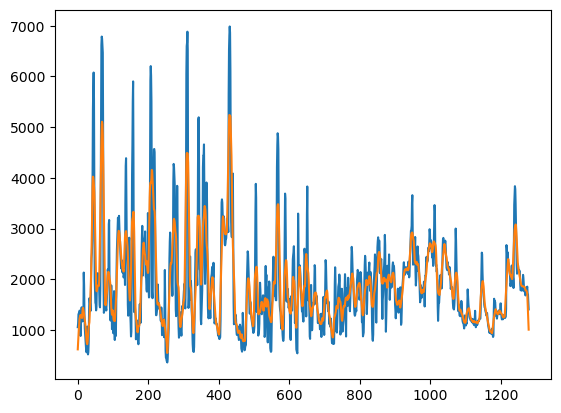

In [34]:
ts1 = X[999]
ts2 = X_scal[999]

plt.plot(ts1)
plt.plot(ts2)
plt.show()

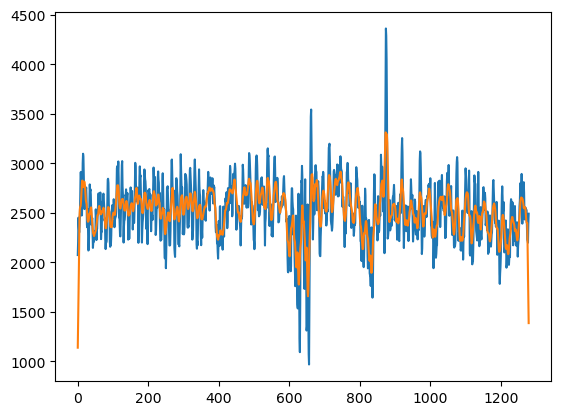

In [35]:
ts1 = X[0]
ts2 = X_scal[0]

plt.plot(ts1)
plt.plot(ts2)
plt.show()

In [36]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

scaler = TabularToSeriesAdaptor(StandardScaler())

In [37]:
X_scal = scaler.fit_transform(X_scal)
X_scal


array([[ 0.17964342,  0.19736762,  0.22335182, ...,  0.27449098,
         0.25194437,  0.22384216],
       [ 0.77276641,  0.89894956,  0.98148512, ..., -0.3926901 ,
        -0.50171537, -0.55011693],
       [-0.49692803, -0.51513015, -0.53475883, ..., -1.53573599,
        -1.52747056, -1.5183433 ],
       ...,
       [ 1.38461435,  1.17907618,  0.9344943 , ...,  0.78424527,
         0.9435485 ,  1.13181887],
       [ 0.53553616,  0.4619204 ,  0.40279658, ..., -1.11042062,
        -1.13535148, -1.12737926],
       [ 0.71172614,  0.76419308,  0.801114  , ...,  0.49879989,
         0.48480302,  0.44287497]])

In [38]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
X_scal2=TimeSeriesScalerMeanVariance().fit_transform(X_scal2)
# X_scal



In [51]:
X_scal2[200].T

array([[-1.86601435, -1.5590269 , -1.26572816, ..., -0.60588006,
        -1.11437862, -1.53673686]])

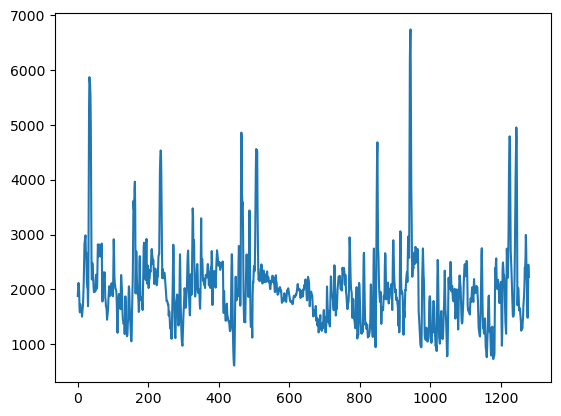

In [41]:
ts1 = X[200].T
ts2 = X_scal2[200].T

#plt.plot(ts1)
plt.plot(ts2)
plt.show()


In [47]:
ts2.shape

(1280,)

In [48]:
ts1.shape

(1280,)

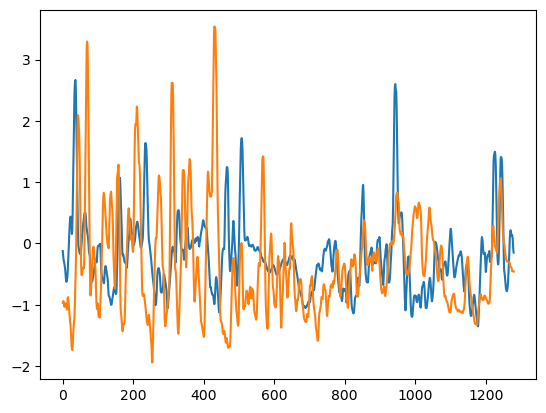

In [45]:
ts1 = X_scal[200].T
ts2 = X_scal[999].T
plt.plot(ts1)
plt.plot(ts2)
plt.show()

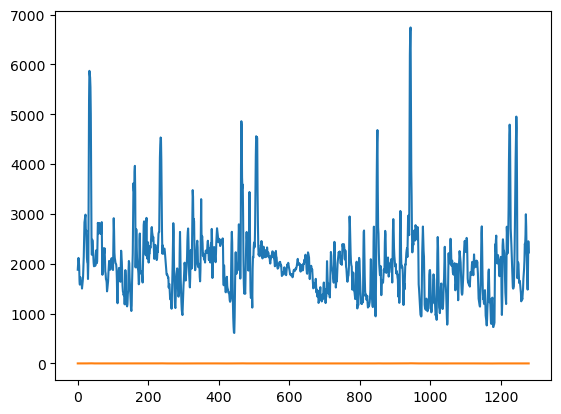

In [28]:
ts1 = X[200].T
ts2 = X_scal[200].T

plt.plot(ts1)
plt.plot(ts2)
plt.show()


In [52]:
df_scal = pd.DataFrame(np.squeeze(X_scal))
df_scal['genre'] = y

df_scal


,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,0.179643,0.197368,0.223352,0.269043,0.337453,0.393320,0.462613,0.483756,0.477671,0.510316,...,0.391320,0.336722,0.299514,0.294786,0.304868,0.286816,0.274491,0.251944,0.223842,emo
1,0.772766,0.898950,0.981485,1.085315,1.184199,1.256492,1.413576,1.538032,1.607623,1.615395,...,-0.298808,-0.382767,-0.387644,-0.351460,-0.338625,-0.335258,-0.392690,-0.501715,-0.550117,emo
2,-0.496928,-0.515130,-0.534759,-0.553664,-0.575250,-0.604675,-0.660187,-0.725482,-0.788267,-0.845848,...,-1.472973,-1.501316,-1.527545,-1.542656,-1.548020,-1.541948,-1.535736,-1.527471,-1.518343,emo
3,0.590965,0.581073,0.563486,0.543997,0.532055,0.488017,0.403936,0.333549,0.291302,0.256175,...,0.442482,0.515374,0.576675,0.628336,0.691124,0.782620,0.830792,0.865247,0.859878,emo
4,0.686291,0.559710,0.470667,0.388733,0.314552,0.281221,0.197482,0.119820,0.027100,-0.022589,...,-0.199391,-0.543647,-0.735846,-0.836834,-0.949591,-0.996499,-0.990748,-0.969298,-0.944938,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.622781,-1.634961,-1.659650,-1.687314,-1.710684,-1.737070,-1.748911,-1.755666,-1.761456,-1.772076,...,-1.641629,-1.657455,-1.673229,-1.682062,-1.685017,-1.682124,-1.682191,-1.676604,-1.663172,world-music
1996,-0.699531,-0.738739,-0.768562,-0.766547,-0.751010,-0.757777,-0.791139,-0.815983,-0.836421,-0.866980,...,-0.375925,-0.368290,-0.338812,-0.304303,-0.272111,-0.263042,-0.243825,-0.216180,-0.171241,world-music
1997,1.384614,1.179076,0.934494,0.746323,0.603155,0.486285,0.238082,-0.021640,-0.247562,-0.338726,...,-0.196797,-0.230127,-0.064281,0.218961,0.538788,0.641748,0.784245,0.943549,1.131819,world-music
1998,0.535536,0.461920,0.402797,0.353720,0.302970,0.250092,0.136316,0.056960,0.023574,-0.010163,...,-0.844140,-1.011105,-1.093230,-1.081019,-1.060747,-1.077901,-1.110421,-1.135351,-1.127379,world-music


In [55]:
df_scal.to_csv('df_scal.csv', index=False)  # index=False per evitare di salvare l'indice
np.save('X_scal', X_scal)

In [62]:
df = pd.DataFrame(X_reshaped)
df['genre'] = y
df_melt = df.melt(value_name="observation", var_name="time")


In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1271,1272,1273,1274,1275,1276,1277,1278,1279,genre
0,768.953928,828.022584,941.386304,945.749554,1159.725465,1240.333451,1423.674344,1634.191655,1828.503961,1847.519588,...,1340.313921,1279.665800,1360.056734,1444.307480,1517.640273,1458.297057,1442.914786,1391.236018,1321.283908,opera
1,3230.211119,3344.520081,3136.686050,2845.915331,2808.156723,2651.146880,2495.342218,2549.019959,2661.295847,2727.635261,...,2694.619211,3191.035809,2830.924961,2308.329541,1724.827512,1325.563666,1130.380398,978.286919,899.698980,minimal-techno
2,2192.694219,1986.904857,2082.598864,2254.738538,2401.683572,2407.616566,2217.455236,2091.153692,1957.757435,1862.646861,...,3025.026862,3222.103029,3303.188014,3347.910378,3343.393614,3378.469131,3533.683709,3432.652557,3476.442086,goth
3,1050.270174,1122.238261,1176.087855,1132.076020,1099.776970,1044.397110,1017.142440,1071.410733,1101.055515,1114.730346,...,877.321930,859.559805,802.391176,798.260556,753.313485,770.064609,804.954898,839.047077,851.398559,opera
4,2467.430056,2222.344861,2053.680022,1733.958104,1115.226422,821.548505,964.249252,1550.314474,2235.348186,2176.156140,...,763.993678,1417.110211,1939.536578,1798.345901,1245.512644,1079.249670,1005.486618,926.054992,964.566937,minimal-techno


# Approximation 

## PAA

In [29]:
#!pip install --upgrade sktime
!pip install pyts

  Obtaining dependency information for pyts from https://files.pythonhosted.org/packages/b3/e3/da2042a20782b105631abe273ca5fef4390e7bdb6f5377c596891262437b/pyts-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 8.1 MB/s eta 0:00:0000:0100:01


In [30]:
from pyts.approximation import PiecewiseAggregateApproximation

In [22]:
from sktime.transformations.series.paa import PAA

In [46]:
X = np.load('X_scal.npy')

In [47]:
X.shape

(2000, 1280)

In [48]:
window_size = 4

paa = PiecewiseAggregateApproximation(window_size=window_size)
X_paa = paa.transform(X)
X.shape, X_paa.shape


((2000, 1280), (2000, 320))

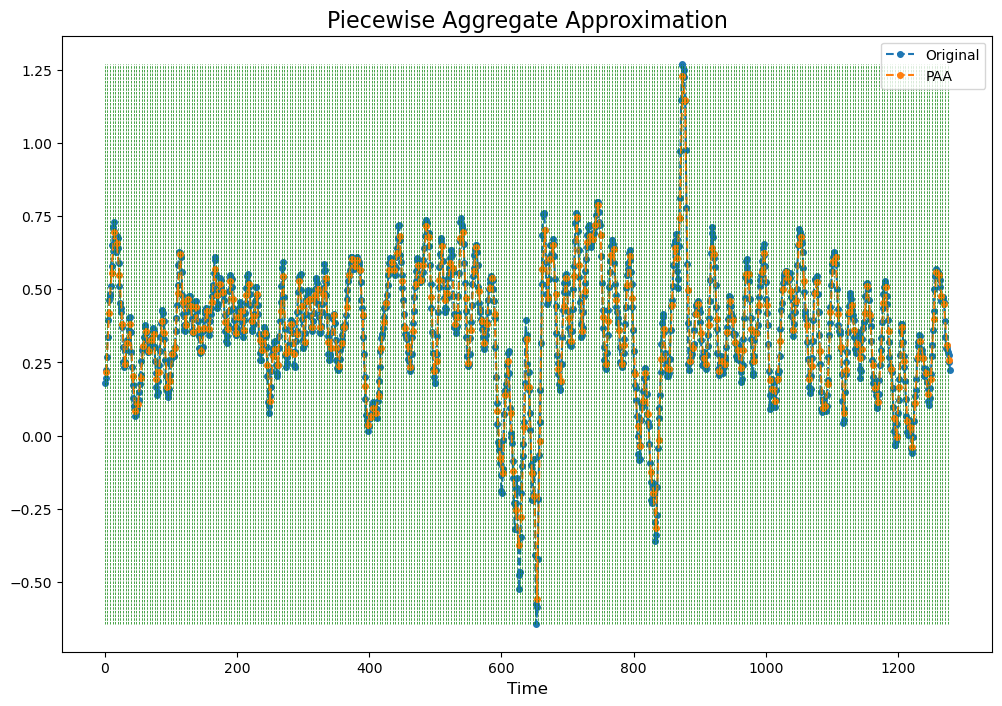

In [49]:
n_timestamps =  1280

# Show the results for the first time series  
plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   n_timestamps + window_size // 2,
                   window_size), X_paa[0], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, n_timestamps, window_size) - 0.5,
           X[0].min(), X[0].max(), color='g', linestyles='--', linewidth=0.5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('Piecewise Aggregate Approximation', fontsize=16)
plt.show()


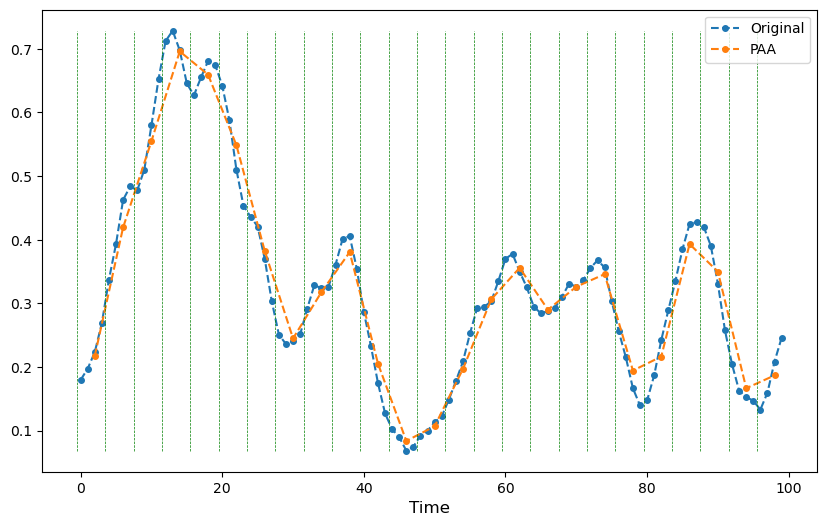

In [50]:
# Definire la lunghezza ridotta desiderata
lunghezza_ridotta = 100

# Visualizza solo i primi 500 timestamp della prima serie temporale
plt.figure(figsize=(10, 6))
plt.plot(X[0][:lunghezza_ridotta], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   lunghezza_ridotta + window_size // 2,
                   window_size), X_paa[0][:lunghezza_ridotta//window_size], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, lunghezza_ridotta, window_size) - 0.5,
           X[0][:lunghezza_ridotta].min(), X[0][:lunghezza_ridotta].max(), color='g', linestyles='--', linewidth=0.5)
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
#plt.title('Piecewise Aggregate Approximation (Shortened)', fontsize=16)
plt.show()


In [51]:
np.savez('X_paa', X_paa)


In [73]:
X_paa = np.load('X_paa.npz')

In [75]:
X_paa = X_paa['arr_0']

X_paa.shape


(2000, 320)

In [52]:
# now each 1-dimentional array has 100 observations
## these np array can also be saved if needed 

In [53]:
"""X_train, X_test, y_train, y_test = train_test_split(
    X_paa, y_encoded, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
"""

'X_train, X_test, y_train, y_test = train_test_split(\n    X_paa, y_encoded, test_size=0.2, random_state=42, stratify=y\n)\nX_train.shape, X_test.shape, y_train.shape, y_test.shape\n'

In [87]:
y = np.load('y.npy', allow_pickle=True)


In [88]:
y.shape

(2000,)

In [89]:
df_paa = pd.DataFrame(np.squeeze(X_paa))
df_paa['genre'] = y
df_paa.to_csv('df_paa.csv', index=False)


## SAX

In [90]:
from tslearn.piecewise import SymbolicAggregateApproximation


In [ ]:
X.shape

(10000, 1, 1280)

In [91]:
## SAX with 50 symbols and 500 segments - erano quelli che plottando la TS davano risultato migliore

n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=500, 
                                     alphabet_size_avg=n_sax_symbols, scale=True)
X_sax = sax.fit_transform(X)
#sax_dataset_inv = sax.inverse_transform(X_train_sax)


/Users/daviderizzello/anaconda3/lib/python3.11/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 2000 1-dimensional timeseries
  warnings.warn(


In [92]:
X_sax.shape

(2000, 500, 1)

In [93]:
X_sax = X_sax.squeeze()
X_sax.shape


(2000, 500)

In [94]:
np.unique(X_sax[1], return_counts=True)


(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([  1,   6,  26,  55,  76,  90, 108,  77,  61]))

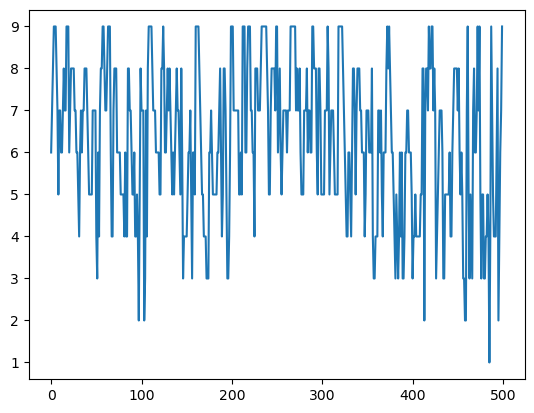

In [95]:
plt.plot(X_sax[1])


In [96]:
np.save('X_sax', X_sax)

In [97]:
df_sax = pd.DataFrame(np.squeeze(X_sax))
df_sax['genre'] = y
df_sax.to_csv('df_sax.csv', index=False)


In [ ]:
"""
X_train, X_test, y_train, y_test = train_test_split(
    X_sax, y_encoded, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
"""

((8000, 100), (2000, 100), (8000,), (2000,))

In [98]:
df_sax

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,genre
0,4,5,5,6,7,6,6,8,7,6,...,5,5,6,6,6,6,7,7,7,emo
1,6,7,8,9,9,9,8,7,5,7,...,4,4,6,8,2,4,6,7,9,emo
2,3,2,2,2,2,1,1,1,7,7,...,8,5,3,2,2,2,2,3,7,emo
3,6,6,6,6,5,4,5,6,5,5,...,5,5,5,6,7,7,7,9,9,emo
4,8,6,4,4,4,6,4,4,5,5,...,5,9,7,5,9,9,1,1,2,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,world-music
1996,2,2,1,2,2,2,1,1,4,5,...,5,5,5,4,4,4,3,6,9,world-music
1997,9,8,5,2,2,2,4,4,2,2,...,3,3,3,6,4,3,2,2,2,world-music
1998,7,6,5,4,4,3,5,5,5,5,...,6,7,8,9,9,9,8,7,5,world-music


## DFT

In [99]:
from pyts.approximation import DiscreteFourierTransform

In [100]:
n_coefs = 64

dft = DiscreteFourierTransform(n_coefs=n_coefs)
X_dft = dft.fit_transform(X)
X_dft.shape


(2000, 64)

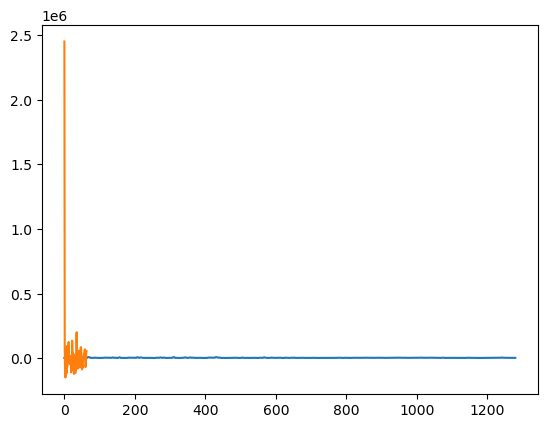

In [102]:
n= 999
plt.plot(X[n])
plt.plot(X_dft[n])
plt.show()


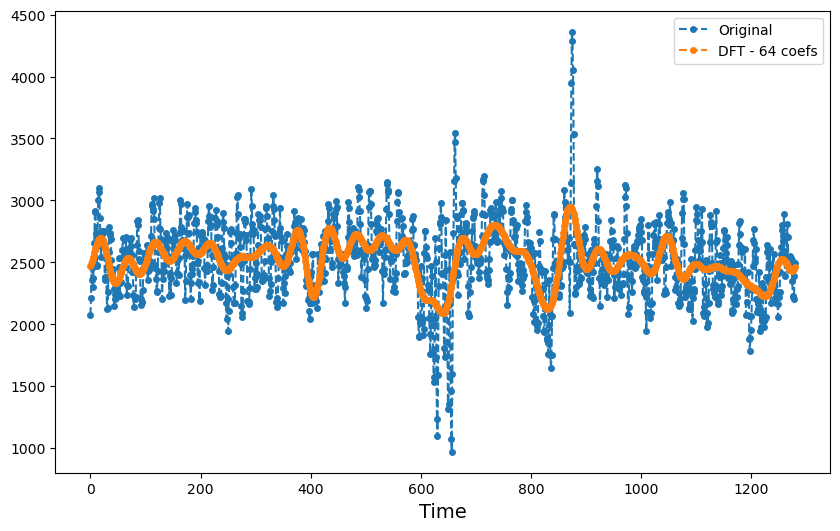

In [104]:
# Parameters
n_timestamps = 1280
n_samples = 2000

# Compute the inverse transformation
if n_coefs % 2 == 0:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                        np.zeros((n_samples, ))]
    ]
else:
    real_idx = np.arange(1, n_coefs, 2)
    imag_idx = np.arange(2, n_coefs + 1, 2)
    X_dft_new = np.c_[
        X_dft[:, :1],
        X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
    ]
X_irfft = np.fft.irfft(X_dft_new, n_timestamps)

# Show the results for the first time series
plt.figure(figsize=(10, 6))
plt.plot(X[0], 'o--', ms=4, label='Original')
plt.plot(X_irfft[0], 'o--', ms=4, label='DFT - {0} coefs'.format(n_coefs))
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=14)
#plt.title('Discrete Fourier Transform', fontsize=16)
plt.show()


In [105]:
np.save('X_dft', X_dft)


In [106]:
df_dft = pd.DataFrame(np.squeeze(X_dft))
df_dft['genre'] = y
df_dft.to_csv('df_dft.csv', index=False)
df_dft.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,genre
0,3.227065e+06,-22400.550739,-23779.138585,-27759.542030,-15905.077262,6709.414523,-17933.568156,-25160.054242,-21031.760200,29145.768651,...,-9061.909391,-74.118407,-2177.277498,8472.157286,-9803.919283,1328.098138,-3887.355000,-8085.923684,-4102.006090,emo
1,3.382283e+06,-111563.865313,-127274.767845,-12500.372909,-14307.395900,715.697271,-169509.218142,-2351.066028,-76818.554231,60909.639133,...,-3945.279080,10790.325191,20307.134678,-12605.704974,-5090.978805,-8511.374657,38599.127460,-18026.264613,18714.422782,emo
2,2.761356e+06,-186817.219195,-29341.361089,-48154.967010,-153147.044283,39957.743127,-41197.301771,55305.041969,14849.470549,-78217.346803,...,12645.392657,-38772.374094,-40440.131609,6412.636953,-9239.593243,1321.245402,24912.745453,38812.491478,4193.682365,emo
3,3.289354e+06,-82124.026056,36084.675694,-5233.821250,44657.478211,58886.458694,24659.805526,-53054.796146,-43760.630221,29923.953945,...,47962.670314,26640.419140,-1213.950906,46525.207132,-25305.432480,-45224.521046,27835.872495,-13238.052336,-2155.216706,emo
4,3.326639e+06,-4852.092155,-13959.544539,28155.802986,43007.506778,74021.646153,-49373.093700,-41763.501221,-86486.960489,-4352.240459,...,-329.447420,16305.132921,-124378.106784,-144486.055137,9852.647934,70391.747299,65925.656002,145080.873031,38455.183504,emo
